### Побудуємо модель простої регресії для знаходження залежності між значеннями протяжності навчання та середнього балу студентів

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 10,8

#Відкриваємо датафрейм 

In [9]:
df = 'student_scores.csv'
students = pd.read_csv(df)


In [10]:
X = students[['Hours']].values
y = students[['Scores']].values

#Створюємо екземпляр моделі лінійної регресії

In [11]:
model_rg =LinearRegression()
model_rg.fit(X,y)

LinearRegression()

#Виведемо діаграму даної моделі

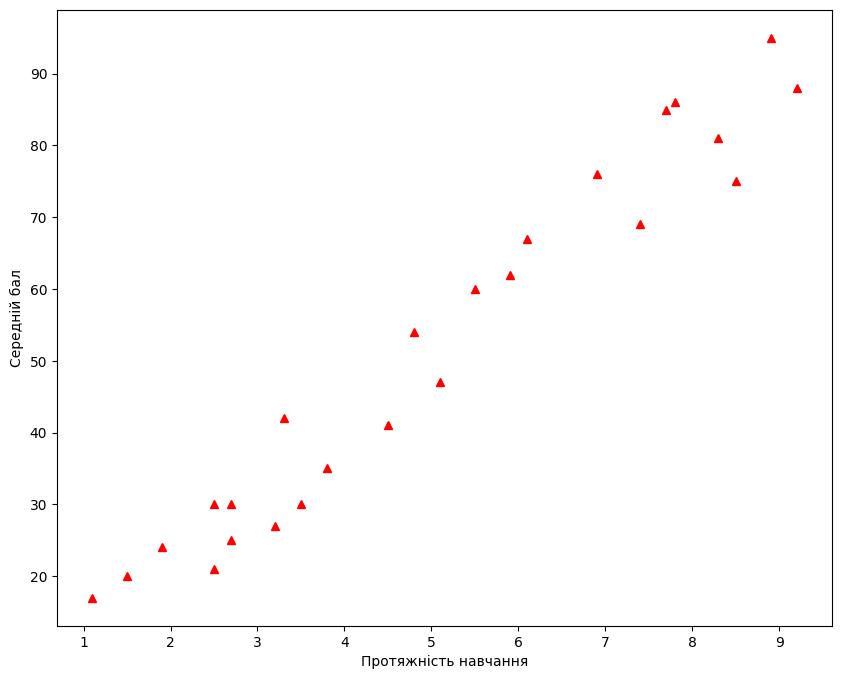

In [12]:
plt.plot(X, y, 'r^')
plt.xlabel('Протяжність навчання')
plt.ylabel('Середній бал')
plt.show()

 #Виведемо показник точності моделі використовуючи функцію score

In [13]:
print(model_rg.score(X, y))

0.9529481969048356


In [14]:
y_pred = model_rg.predict(X)
print(y_pred)

[[26.92318188]
 [52.3402707 ]
 [33.76624426]
 [85.57800223]
 [36.69898527]
 [17.14737849]
 [92.4210646 ]
 [56.25059205]
 [83.62284155]
 [28.87834256]
 [77.75735951]
 [60.16091341]
 [46.47478866]
 [34.74382459]
 [13.23705714]
 [89.48832358]
 [26.92318188]
 [21.05769985]
 [62.11607409]
 [74.8246185 ]
 [28.87834256]
 [49.40752968]
 [39.63172629]
 [69.9367168 ]
 [78.73493985]]


#Оцінка якості лінійної регресії

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
mae = mean_absolute_error(y,y_pred)
mse= mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)

In [20]:
print(f'Mean absolute error:{mae}')
print(f'Mean squared error:{mse}')
print(f'Root mean squared error:{rmse}')

Mean absolute error:4.972805319866375
Mean squared error:28.882730509245466
Root mean squared error:5.374265578592619


### Побудуємо модель множинної регресії для знаходження залежності між значеннями споживання бензину і похідними факторами


In [1]:
import numpy as np
import pandas as pd

import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8 

from collections import Counter

In [5]:
df_2 = 'petrol_consumption.csv'
petrol = pd.read_csv(df_2)
petrol.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


D:\Projects_Git\Lesson_35_Linear_regression\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


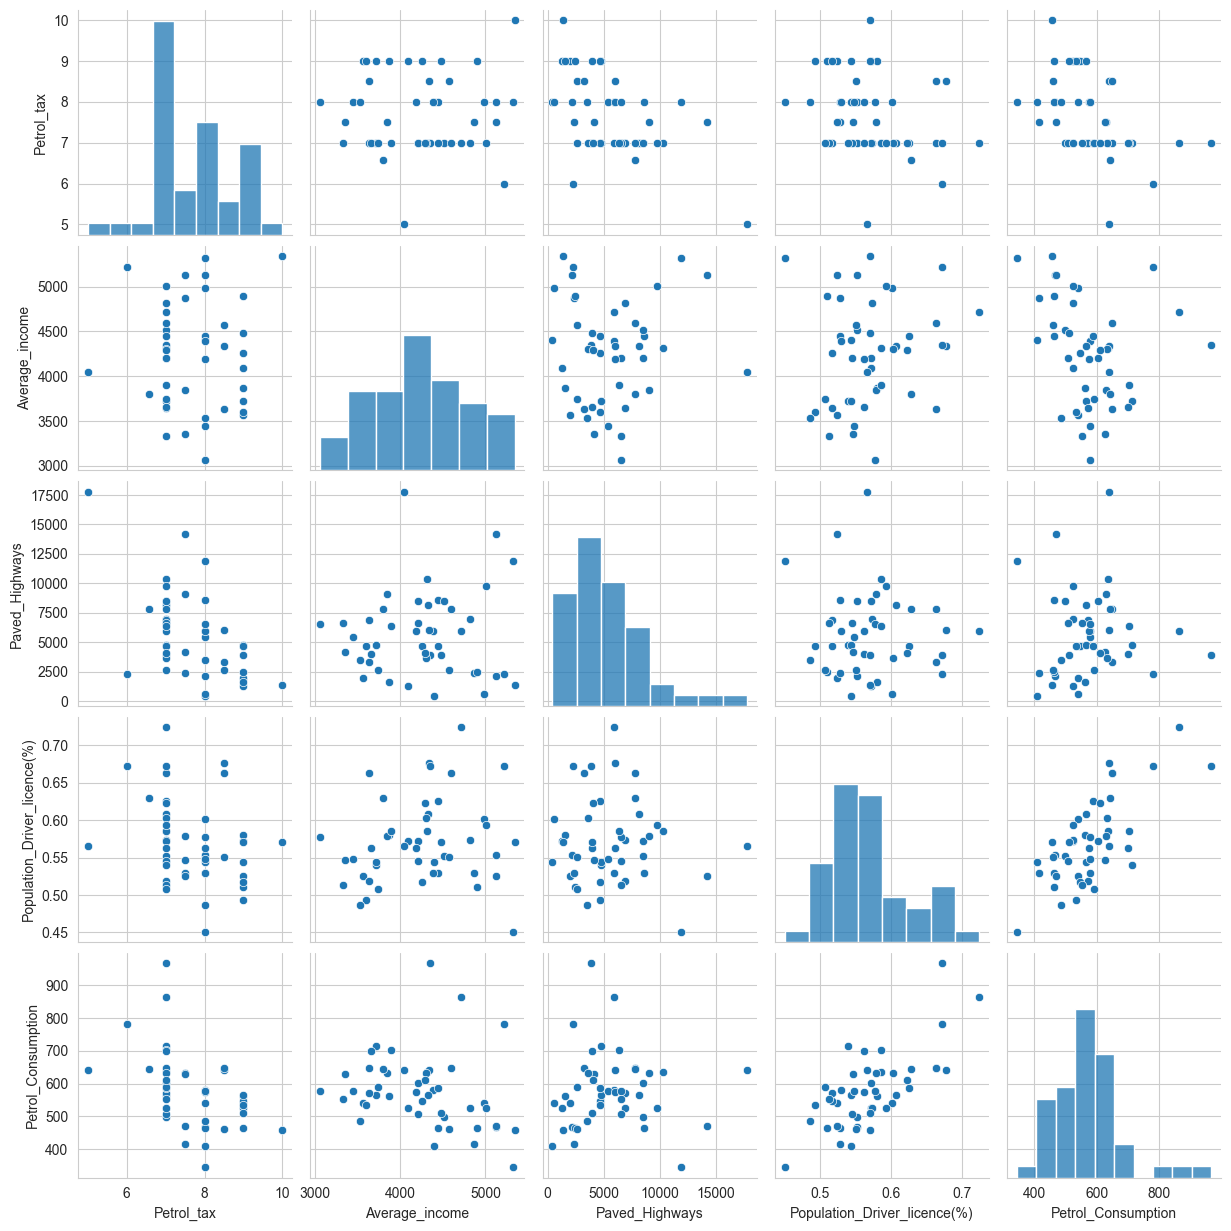

In [6]:
sb.pairplot(petrol)

In [7]:
correlations = petrol.corr()
correlations

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


[Text(0.5, 1.0, 'Теплова карта залежності споживання палива і похідними факторами - кореляція Пірсона')]

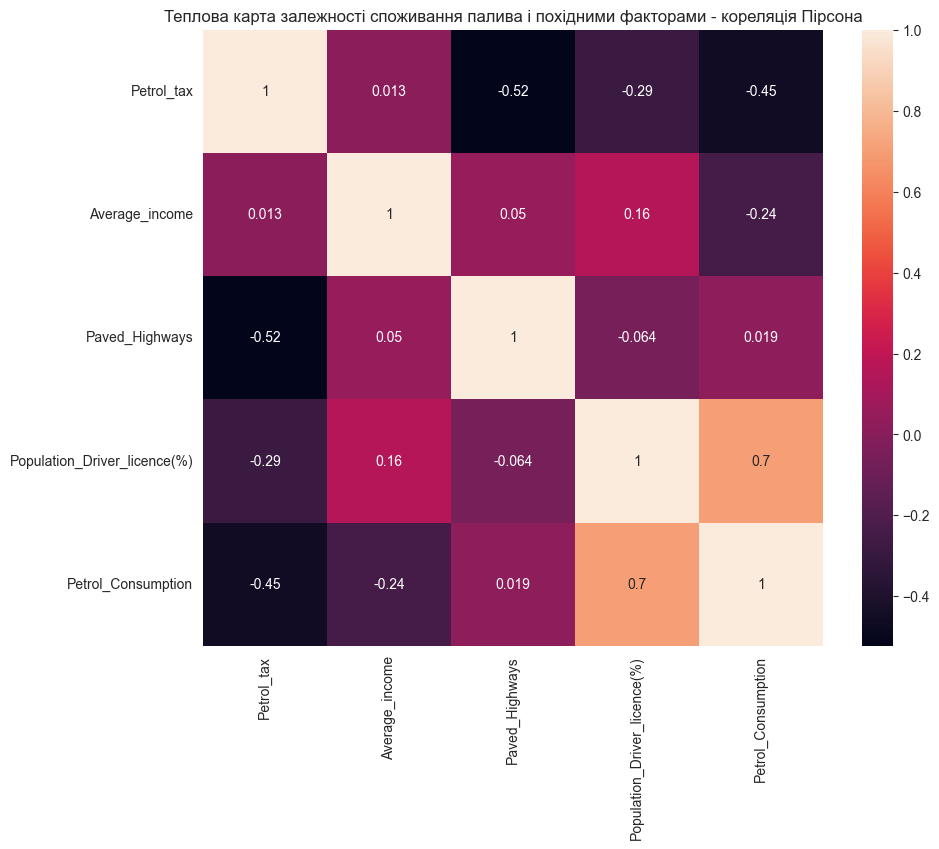

In [8]:
sb.heatmap(correlations, annot=True).set(title='Теплова карта залежності споживання палива і похідними факторами - кореляція Пірсона')

#Візьмемо за у = Petrol_tax, тоді враховуючи показники кореляції(низькі кореляційні зв'язки) предикторами будуть Average_income, Population_Driver_licence(%)

In [12]:
petrol_data = petrol[['Average_income', 'Population_Driver_licence(%)']].values
petrol_target = petrol[['Petrol_tax']].values

X, y = scale(petrol_data), petrol_target

In [13]:
# Missing Values
missing_values = X == np.NAN
X[missing_values == True] 

array([], dtype=float64)

In [14]:
LinReg = LinearRegression()

LinReg.fit(X, y)

print(LinReg.score(X, y))

0.08640347198578746


In [15]:
print('intercept: ', LinReg.intercept_)
print('slope: ', LinReg.coef_)

intercept:  [7.66833333]
slope:  [[ 0.05585794 -0.27976295]]


In [16]:
y_pred = LinReg.predict(X)
print('prediction: ', y_pred, sep='\n')

prediction: 
[[7.83337519]
 [7.64509382]
 [7.58198047]
 [7.94081952]
 [7.81801674]
 [7.77320041]
 [8.38255873]
 [7.84368758]
 [7.89919303]
 [7.78836204]
 [7.88858534]
 [7.98639931]
 [7.70624577]
 [7.7940256 ]
 [7.48522518]
 [7.59597812]
 [7.65631231]
 [7.77138843]
 [6.93177946]
 [7.13442837]
 [7.230583  ]
 [7.57986974]
 [8.03521979]
 [7.94175613]
 [7.79956017]
 [7.75129626]
 [7.70404354]
 [7.58520757]
 [7.7004126 ]
 [7.99942655]
 [7.87584326]
 [7.87111631]
 [7.51325112]
 [7.70018528]
 [8.02282386]
 [7.32603525]
 [7.67104974]
 [7.55454844]
 [7.13630834]
 [7.16030624]
 [7.40499564]
 [7.64805965]
 [7.50756037]
 [7.93714456]
 [7.24592102]
 [7.68797926]
 [7.40522979]
 [7.62761111]]


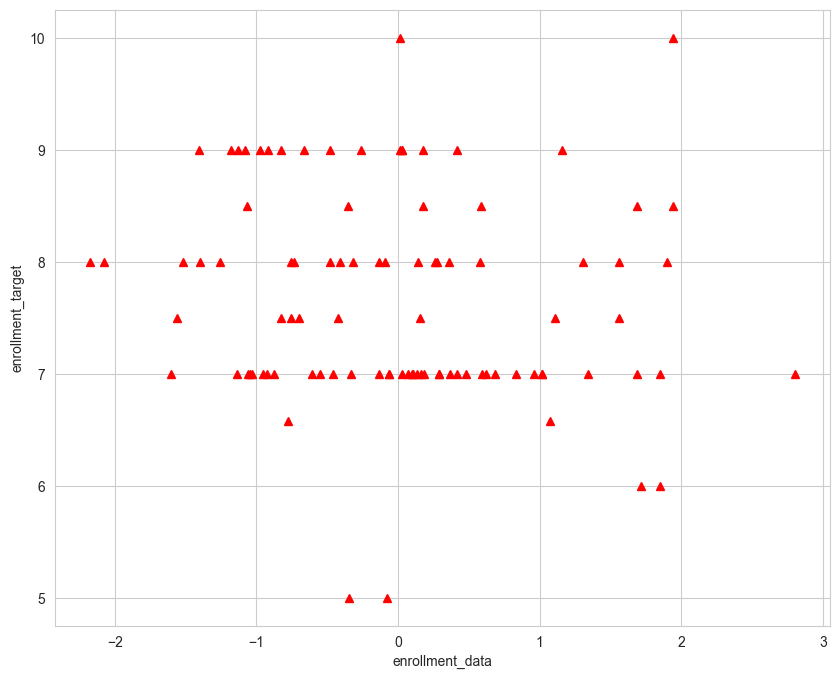

In [17]:
plt.plot(X, y, 'r^')
plt.xlabel('enrollment_data')
plt.ylabel('enrollment_target')
plt.show()

#Оцінка якості лінійної регресії

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
import numpy as np

In [21]:
mae = mean_absolute_error(y,y_pred)
mse= mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)

In [22]:
print(f'Mean absolute error:{mae}')
print(f'Mean squared error:{mse}')
print(f'Root mean squared error:{rmse}')


Mean absolute error:0.7208973373093247
Mean squared error:0.8086522023948466
Root mean squared error:0.8992509118120741
